This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es) and [jorge.calero@urjc.es](mailto:jorge.calero@urjc.es)

This notebook is an introduction to descriptive statistics using pandas. The first step when working with data is to perform an exploratory analysis to get some intuitions about how data is distributed. 


# 1. Load libraries

- [Pandas](https://pandas.pydata.org): high level data analysis
- [Numpy](https://numpy.org): scientific computing
- [Matplotlib](https://matplotlib.org): visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Pandas

The pandas library includes two types of data structures:

- [**Series**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) which are one-dimensional ndarray with axis labels (including time series)
- [**DataFrames**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame): Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

Let's see some examples.

## 2.1 Series

In [2]:
s = pd.Series([1,2,3,"catorce"])
print(s)

0          1
1          2
2          3
3    catorce
dtype: object


In [8]:
s.index
#s[3]
# s[0:3]
#s.values
# s.values * 2

RangeIndex(start=0, stop=4, step=1)

Indexes can be easily changed

In [9]:
s = pd.Series(data =[1,2,3,"catorce"], index = ['hola','que','tal','estas'])
print(s)

hola           1
que            2
tal            3
estas    catorce
dtype: object


In [11]:
s['hola']
# s[0]
# s[0:3]

1

## 2.2 DataFrames

[DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) can be constructed by using:

- Numpy ndarray
- Dictionaries

In [12]:
# from Numpy ndarray
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [24]:
# from dictionary
queen_dict = {}
queen_dict["name"]=["Freddie" ,"Roger", "Brian", "John"]
queen_dict["surname"] = ["Mercury","Taylor", "May", "Deacon"]
queen_dict["year_of_birth"]= [1946,1949, 1947, 1951]

queen_df = pd.DataFrame(data = queen_dict)
queen_df

,name,surname,year_of_birth
0,Freddie,Mercury,1946
1,Roger,Taylor,1949
2,Brian,May,1947
3,John,Deacon,1951


### Pandas operations

In [16]:
# main properties
queen_df.index
queen_df.columns
#queen_df.shape

Index(['name', 'surname', 'year_of_birth'], dtype='object')

In [29]:
# change index
queen_df.index = ['voice','drums','guitar','bass']
queen_df

,name,surname,year_of_birth
voice,Freddie,Mercury,1946
drums,Roger,Taylor,1949
guitar,Brian,May,1947
bass,John,Deacon,1951


In [28]:
# reset index
queen_df.reset_index()
#queen_df.reset_index(drop = True)

,index,name,surname,year_of_birth
0,0,Freddie,Mercury,1946
1,1,Roger,Taylor,1949
2,2,Brian,May,1947
3,3,John,Deacon,1951


In [19]:
# set index
queen_df.set_index('name',inplace = True)
queen_df

,surname,year_of_birth
name,,
Freddie,Mercury,1946
Roger,Taylor,1949
Brian,May,1947
John,Deacon,1951


In [25]:
# Get column values
queen_df['name'] # note that this is a Series
#queen_df['name'].values

0    Freddie
1      Roger
2      Brian
3       John
Name: name, dtype: object

In [26]:
# Get several columns
queen_df[['surname','name']] # note that this is a DataFrame
#queen_df[['surname','name']].values

,surname,name
0,Mercury,Freddie
1,Taylor,Roger
2,May,Brian
3,Deacon,John


In [30]:
# Get rows
queen_df.loc['voice']

#queen_df.loc['voice'].values
#queen_df.loc[['voice','drums'],'name']
#queen_df.loc[['voice','drums'],['name','surname']]
#queen_df.iloc[0]
#queen_df.iloc[0:2]
#queen_df.iloc[0:2,1:]

name             Freddie
surname          Mercury
year_of_birth       1946
Name: voice, dtype: object

# 3. Load data in Pandas

In [35]:
#df = pd.read_excel('./data/Datos.xlsx') # this needs extra libraries
df = pd.read_csv('./data/Datos.csv')
df.shape

(173, 9)

In [38]:
# some options
df.head()

df.tail()
df.sample(10)
df.dtypes
df.drop(columns = 'Id')

,Sat_fat_dr,Sat_fat_ffq,Total_fat_dr,Total_fat_ffq,Alcoh_dr,Alcoh_ffq,Calor_dr,Calor_ffq
0,33.20,21.2,81.15,53.8,8.26,1.68,1807,1242.2
1,17.73,10.6,53.28,36.6,0.83,0.00,1418,907.0
2,38.73,23.8,83.48,47.2,20.13,15.10,1889,786.0
3,21.57,22.7,49.65,55.3,11.16,7.49,1426,1392.5
4,21.35,30.4,55.18,71.0,7.18,12.84,1253,1259.8
...,...,...,...,...,...,...,...,...
168,36.19,18.1,95.43,47.1,4.60,7.25,1976,1204.3
169,22.42,10.9,62.15,32.0,2.56,1.81,1731,981.6
170,16.98,20.4,42.85,47.5,13.91,8.64,1033,1128.3
171,23.98,18.5,67.43,45.9,5.39,7.19,1585,1247.5


## 3.1 Summary statistics

In [39]:
# Mean values
df.mean()       # columns (axis=0) 
df.mean(axis=1) # rows

0      11516.054444
1      11445.560000
2      12281.826667
3      12302.596667
4      12272.750000
           ...     
168    15529.663333
169    15472.382222
170    15414.731111
171    15606.876667
172    20727.620000
Length: 173, dtype: float64

In [40]:
# standard deviation
df.std(ddof=1) 

Id               11701.025452
Sat_fat_dr           6.772596
Sat_fat_ffq          9.275395
Total_fat_dr        16.290839
Total_fat_ffq       21.970692
Alcoh_dr             9.664045
Alcoh_ffq           12.254817
Calor_dr           323.411603
Calor_ffq          482.053536
dtype: float64

In [41]:
# others
df.count()
df.min()
df.median()
df.max()

Id               184093.00
Sat_fat_dr           46.36
Sat_fat_ffq          57.40
Total_fat_dr        119.83
Total_fat_ffq       133.50
Alcoh_dr             49.15
Alcoh_ffq            64.75
Calor_dr           2518.00
Calor_ffq          3077.30
dtype: float64

In [42]:
# summary
df.describe(percentiles = [.05, .25, .5, .75, .95])

,Id,Sat_fat_dr,Sat_fat_ffq,Total_fat_dr,Total_fat_ffq,Alcoh_dr,Alcoh_ffq,Calor_dr,Calor_ffq
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,125997.260116,24.931734,21.915607,68.615376,56.076879,8.962948,8.951329,1619.872832,1371.730058
std,11701.025452,6.772596,9.275395,16.290839,21.970692,9.664045,12.254817,323.411603,482.053536
min,100396.000000,11.820000,5.600000,35.900000,14.800000,0.000000,0.000000,910.000000,463.200000
5%,108847.200000,15.354000,10.780000,44.914000,28.960000,0.000000,0.000000,1103.400000,757.980000
25%,113882.000000,20.200000,15.600000,56.160000,40.800000,1.760000,0.760000,1418.000000,1035.500000
50%,132382.000000,24.160000,19.900000,68.280000,51.700000,5.840000,4.550000,1606.000000,1297.600000
75%,134611.000000,28.260000,25.800000,77.980000,68.000000,12.970000,11.860000,1781.000000,1589.600000
95%,135839.600000,38.700000,39.640000,98.948000,99.280000,28.490000,38.354000,2197.200000,2280.720000
max,184093.000000,46.360000,57.400000,119.830000,133.500000,49.150000,64.750000,2518.000000,3077.300000


<div class="alert alert-block alert-info">
<b>Exercise:</b> Calculate the mean value of a (random) sample of size 10 for the variable Sat_fat_dr.</div>

In [43]:
# Your code here
# ...

## 3.2 Filtering

Let's find the rows for which `Alcoh_dr` is 0.

In [44]:
df[df.Alcoh_dr == 0]

,Id,Sat_fat_dr,Sat_fat_ffq,Total_fat_dr,Total_fat_ffq,Alcoh_dr,Alcoh_ffq,Calor_dr,Calor_ffq
7,107879,19.73,19.1,58.30,48.9,0.0,0.00,1369,1364.1
8,108618,36.31,23.4,92.58,55.4,0.0,0.00,2163,1311.4
9,109000,20.87,16.0,68.44,44.2,0.0,0.00,1609,1200.6
14,109908,25.62,17.4,74.22,51.7,0.0,0.00,1702,1217.7
21,110714,25.10,18.9,80.15,57.5,0.0,0.00,1788,1257.5
33,112738,16.04,17.6,44.23,40.6,0.0,0.00,1183,1326.6
47,114865,29.17,24.8,84.52,71.1,0.0,0.00,1636,1396.7
54,115764,25.47,15.8,75.54,41.6,0.0,1.81,1548,1259.6
58,115879,28.72,35.8,74.26,76.0,0.0,0.00,1641,1961.6
65,129518,20.74,23.7,61.82,68.8,0.0,0.00,1374,1592.4


Now, let's take the cases where `Alcoh_dr` is greater than 0 for the Calors columns.

In [45]:
# option 1
df[df.Alcoh_dr > 0][['Calor_dr','Calor_ffq']]

# option 2
df.loc[df.Alcoh_dr > 0,['Calor_dr','Calor_ffq']]

,Calor_dr,Calor_ffq
0,1807,1242.2
1,1418,907.0
2,1889,786.0
3,1426,1392.5
4,1253,1259.8
...,...,...
168,1976,1204.3
169,1731,981.6
170,1033,1128.3
171,1585,1247.5


## 3.3 Do some plotting

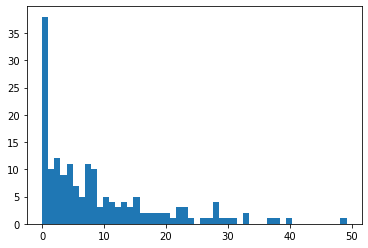

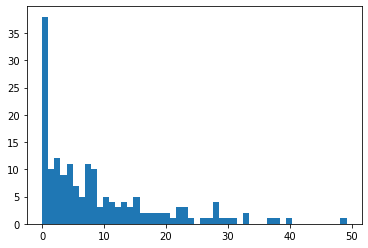

In [46]:
# histograms

# option 1: using pandas
df.Alcoh_dr.hist(bins=50, grid=False)
plt.show()

# option 2: using matplotlib
plt.hist(df.Alcoh_dr.values, bins=50)
plt.show()

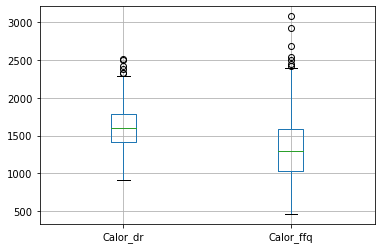

In [47]:
# boxplots
df[['Calor_dr','Calor_ffq']].boxplot()
plt.show()

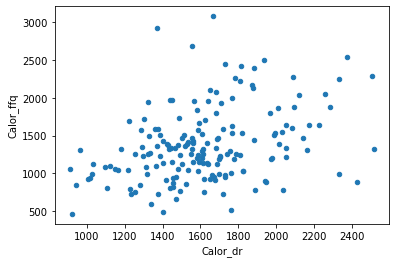

In [48]:
# scatter plots
df.plot.scatter(x = 'Calor_dr', y = 'Calor_ffq')
plt.show()

# References

- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)